In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score,precision_score, f1_score, accuracy_score, classification_report, confusion_matrix,precision_score, roc_curve, auc, precision_recall_curve
from sklearn.neural_network import MLPClassifier  # Import MLPClassifier from scikit-learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
data_df =fetch_ucirepo(id=184) 
X = data_df.data.features 
y = data_df.data.targets 

In [3]:
# Replace "yes" with 1 and "no" with 0 in the features and targets
X.replace({"yes": 1, "no": 0}, inplace=True)
y.replace({"yes": 1, "no": 0}, inplace=True)
#checking for null values
null_values_X = X.isnull().sum()
print("Null values in features(X):")
print(null_values_X)
null_values_y = y.isnull().sum()
print("\nNull values in targets(y):")
print(null_values_y)


Null values in features(X):
temperature          0
nausea               0
lumbar-pain          0
urine-pushing        0
micturition-pains    0
burning-urethra      0
dtype: int64

Null values in targets(y):
bladder-inflammation    0
nephritis               0
dtype: int64


In [4]:
X.head()

,temperature,nausea,lumbar-pain,urine-pushing,micturition-pains,burning-urethra
0,35.5,0,1,0,0,0
1,35.9,0,0,1,1,1
2,35.9,0,1,0,0,0
3,36.0,0,0,1,1,1
4,36.0,0,1,0,0,0


In [5]:
y.head()

,bladder-inflammation,nephritis
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


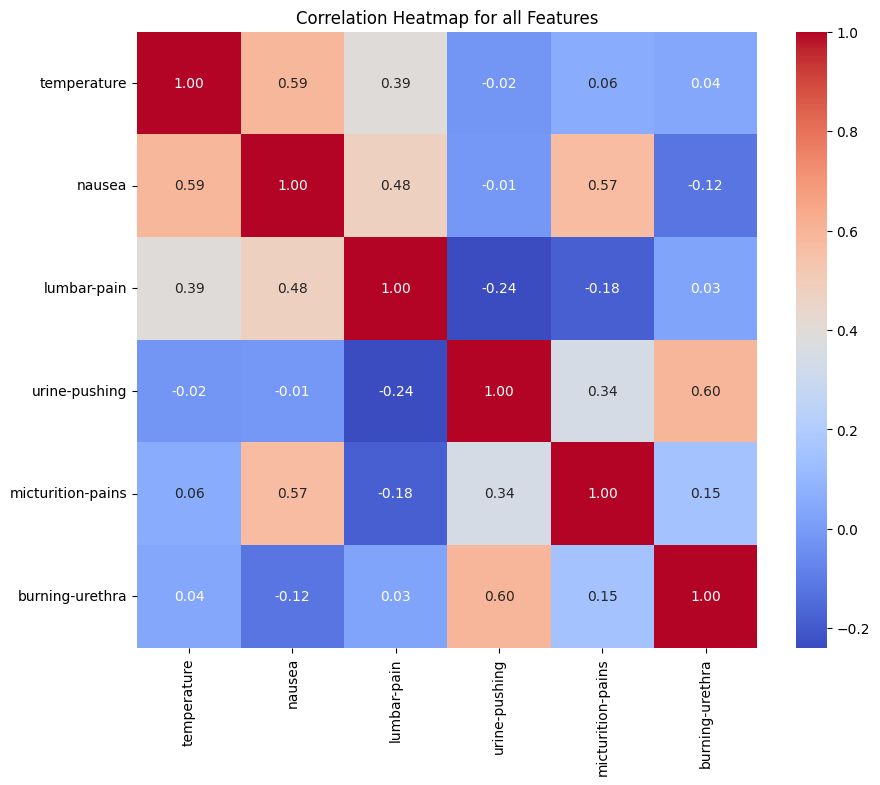

In [6]:
#correlation map for all features
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for all Features')
plt.show()

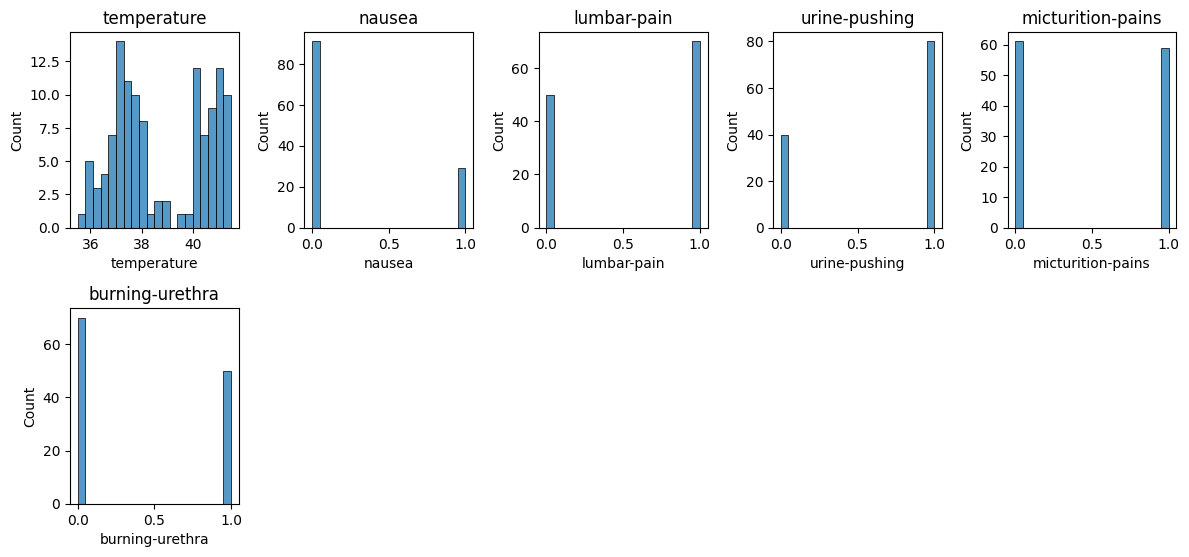

In [7]:
#data visualization
plt.figure(figsize=(12, 8))
for i, col in enumerate(X.columns):
    plt.subplot(3, 5, i+1)
    sns.histplot(X[col], bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()

In [20]:
y_inflamamation = y['bladder-inflammation']
y_nephritis = y['nephritis']
# Spliting the data into training and testing sets
X_train_inflamamation, X_test_inflamamation, y_train_inflamamation, y_test_inflamamation = train_test_split(X, y_inflamamation, test_size=0.2, random_state=42)
X_train_nephritis, X_test_nephritis, y_train_nephritis, y_test_nephritis= train_test_split(X, y_nephritis, test_size=0.2, random_state=42)
# Scaling the features using MinMaxScaler to ensure non-negative values
scaler = MinMaxScaler()
X_train_inflamamation_scaled = scaler.fit_transform(X_train_inflamamation)
X_test_inflamamation_scaled = scaler.transform(X_test_inflamamation)
X_train_nephritis_scaled = scaler.fit_transform(X_train_nephritis)
X_test_nephritis_scaled = scaler.transform(X_test_nephritis)


In [21]:
#training model1 for inflammation prediction
model1=MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
model1.fit(X_train_inflamamation_scaled, y_train_inflamamation)
y_pred1 = model1.predict(X_test_inflamamation_scaled)
#training model1 for nephritis prediction
model2=MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
model2.fit(X_train_nephritis_scaled, y_train_nephritis)
y_pred2 = model2.predict(X_test_nephritis_scaled)


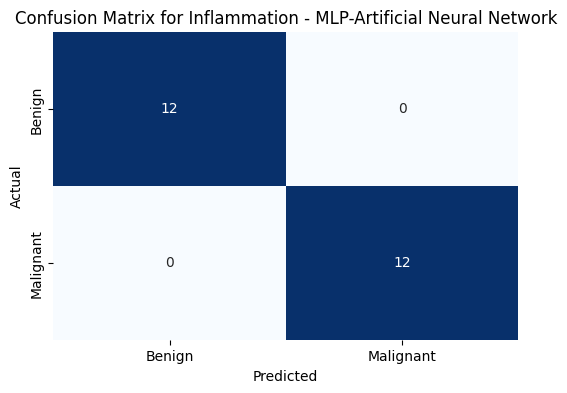

Classification Report for Inflammation - MLP-Artificial Neural Network:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Model Accuracy for Inflammation - MLP-Artificial Neural Network: 100.0


In [22]:
# Evaluating model1
accuracy = accuracy_score(y_test_inflamamation, y_pred1)
conf_matrix = confusion_matrix(y_test_inflamamation, y_pred1)
classification_rep = classification_report(y_test_inflamamation, y_pred1)
# Display the confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Inflammation - MLP-Artificial Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Printing the classification report
print("Classification Report for Inflammation - MLP-Artificial Neural Network:")
print(classification_rep)
print("Model Accuracy for Inflammation - MLP-Artificial Neural Network:" ,accuracy*100)

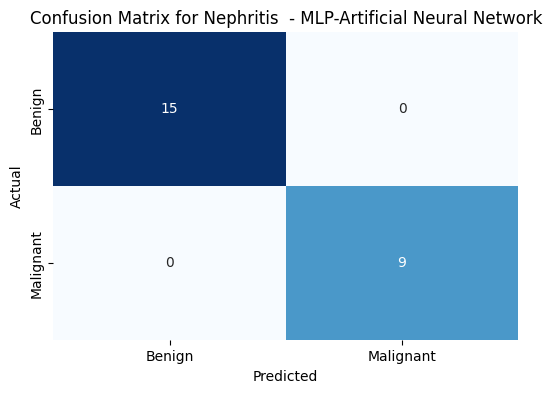

Classification Report for Nephritis - MLP-Artificial Neural Network:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         9

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Model Accuracy for Nephritis - MLP-Artificial Neural Network: 100.0


In [23]:
# Evaluating model2
accuracy = accuracy_score(y_test_nephritis, y_pred2)
conf_matrix = confusion_matrix(y_test_nephritis, y_pred2)
classification_rep = classification_report(y_test_nephritis, y_pred2)
# Display the confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Nephritis  - MLP-Artificial Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Printing the classification report
print("Classification Report for Nephritis - MLP-Artificial Neural Network:")
print(classification_rep)
print("Model Accuracy for Nephritis - MLP-Artificial Neural Network:" ,accuracy*100)

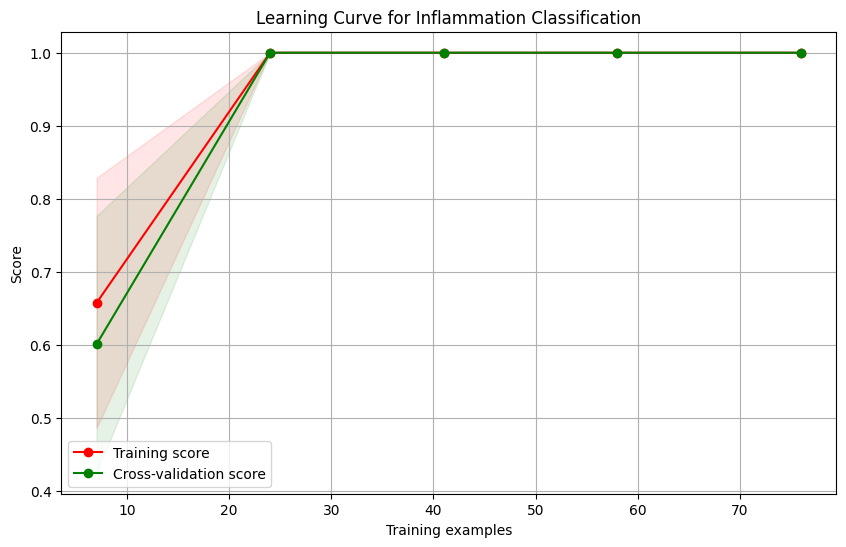

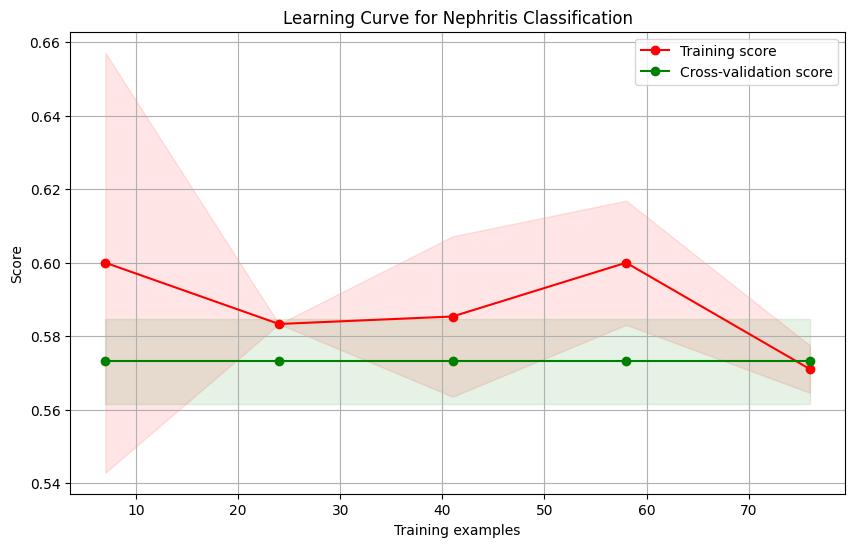

In [24]:
#ploting the learning curve for inflammation prediction and nephritis prediction
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")
    return plt

# Plot learning curve for inflammation classification
fig, ax = plt.subplots(figsize=(10, 6))
plot_learning_curve(model1, "Learning Curve for Inflammation Classification", X_train_inflamamation, y_train_inflamamation, axes=ax, cv=5, n_jobs=4)

# Plot learning curve for nephritis classification
fig, ax = plt.subplots(figsize=(10, 6))
plot_learning_curve(model2, "Learning Curve for Nephritis Classification", X_train_nephritis, y_train_nephritis, axes=ax, cv=5, n_jobs=4)

plt.show()

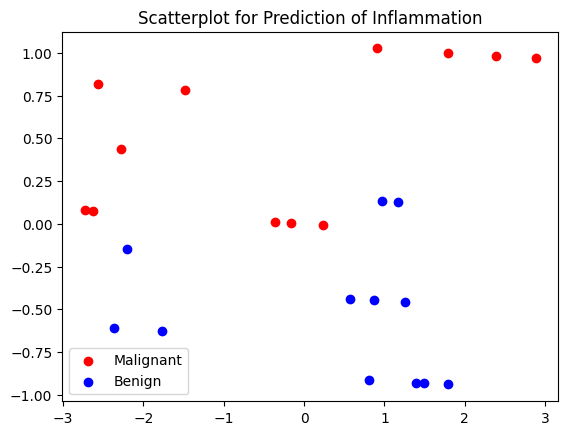

In [25]:
#reduce the dimensionality using PCA
pca = sklearnPCA(n_components=2) 
transformed = pd.DataFrame(pca.fit_transform(X_test_inflamamation))
plt.scatter(transformed[y_pred1==0][0], transformed[y_pred1==0][1], label='Malignant', c='red')
plt.scatter(transformed[y_pred1==1][0], transformed[y_pred1==1][1], label='Benign', c='blue')
plt.legend()
plt.title("Scatterplot for Prediction of Inflammation")
plt.show()

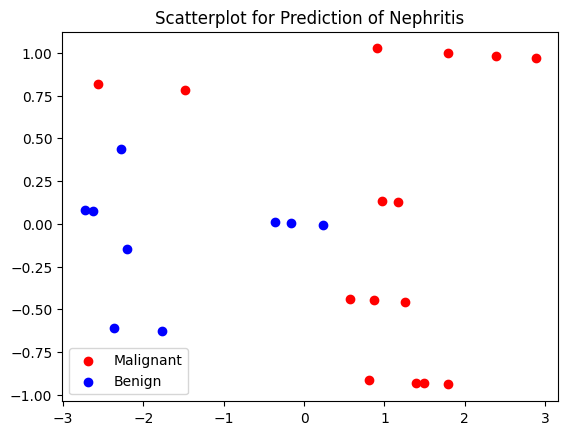

In [27]:
#reduce the dimensionality using PCA
pca = sklearnPCA(n_components=2) 
transformed = pd.DataFrame(pca.fit_transform(X_test_nephritis))
plt.scatter(transformed[y_pred2==0][0], transformed[y_pred2==0][1], label='Malignant', c='red')
plt.scatter(transformed[y_pred2==1][0], transformed[y_pred2==1][1], label='Benign', c='blue')
plt.legend()
plt.title("Scatterplot for Prediction of Nephritis")
plt.show()